# LangGraph Chatbot
We’ll create a simple chatbot using LangGraph. This chatbot will respond directly to user messages. 
We will start by creating a StateGraph. A StateGraph object defines the structure of our chatbot as a state machine.

In [5]:
!pip install langgraph langsmith

In [7]:
!pip install langchain langchain_groq langchain_community

## Add the API keys

In [11]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_API_KEY'] = 'Add your LangChain API Key'
os.environ['LANGCHAIN_PROJECT'] = 'LiveLanggraph'

This will help you getting started with ChatGroq chat models. 

In [15]:
from langchain_groq import ChatGroq

groq_api_key = "Add your Groq API Key"  # Replace with your actual API key
llm = ChatGroq(groq_api_key=groq_api_key, model_name='Gemma2-9b-It')

## Create the graph

In [17]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [18]:
class State(TypedDict):
  messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [19]:
graph_builder

In [20]:
def chatbot(state:State):
  return {"messages" : llm.invoke(state['messages'])}

In [21]:
graph_builder.add_node("chatbot",chatbot)

In [22]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [23]:
graph = graph_builder.compile()

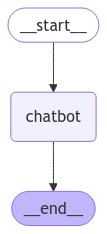

In [24]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

## Use the graph
We can now use the created chatbot.

In [25]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User:  Hello


dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.8e-07, 'queue_time': 0.014608389000000001, 'total_time': 0.027273107}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-e4c0f5b7-657a-46f7-adf3-ea4ba93260e9-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.8e-07, 'queue_time': 0.014608389000000001, 'total_time': 0.027273107}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-e4c0f5b7-657a-4

User:  Who are you?


dict_values([{'messages': AIMessage(content='I am Gemma, an open-weights AI assistant. I am a large language model trained by Google DeepMind. My purpose is to help people by understanding and responding to their requests in a helpful, informative, and impartial way. I can generate text, translate languages, write different kinds of creative content, and answer your questions in an informative way. I am still under development, but I have learned to perform many kinds of tasks.\n\nSince I am open-weights, my weights are publicly accessible. This means that anyone can inspect, modify, or build upon me.\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 118, 'prompt_tokens': 13, 'total_tokens': 131, 'completion_time': 0.214545455, 'prompt_time': 0.000120589, 'queue_time': 0.014288301, 'total_time': 0.214666044}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-25ea2df6-7646-4358-9266-85

User:  q


Good Bye
